In [2]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    
!mkdir images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
        
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.4.1+cu124
Torchvision version: 0.19.1+cu124
CUDA is available: True


ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/segment-anything.git'": Expected package name at the start of dependency specifier
    'git+https://github.com/facebookresearch/segment-anything.git'
    ^
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [8]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [10]:
image = cv2.imread("D:\\ML\\fruits-360\\Training\\Apple\\0_100 (9).jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)


c:\Users\jayme\AppData\Local\Programs\Python\Python312\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

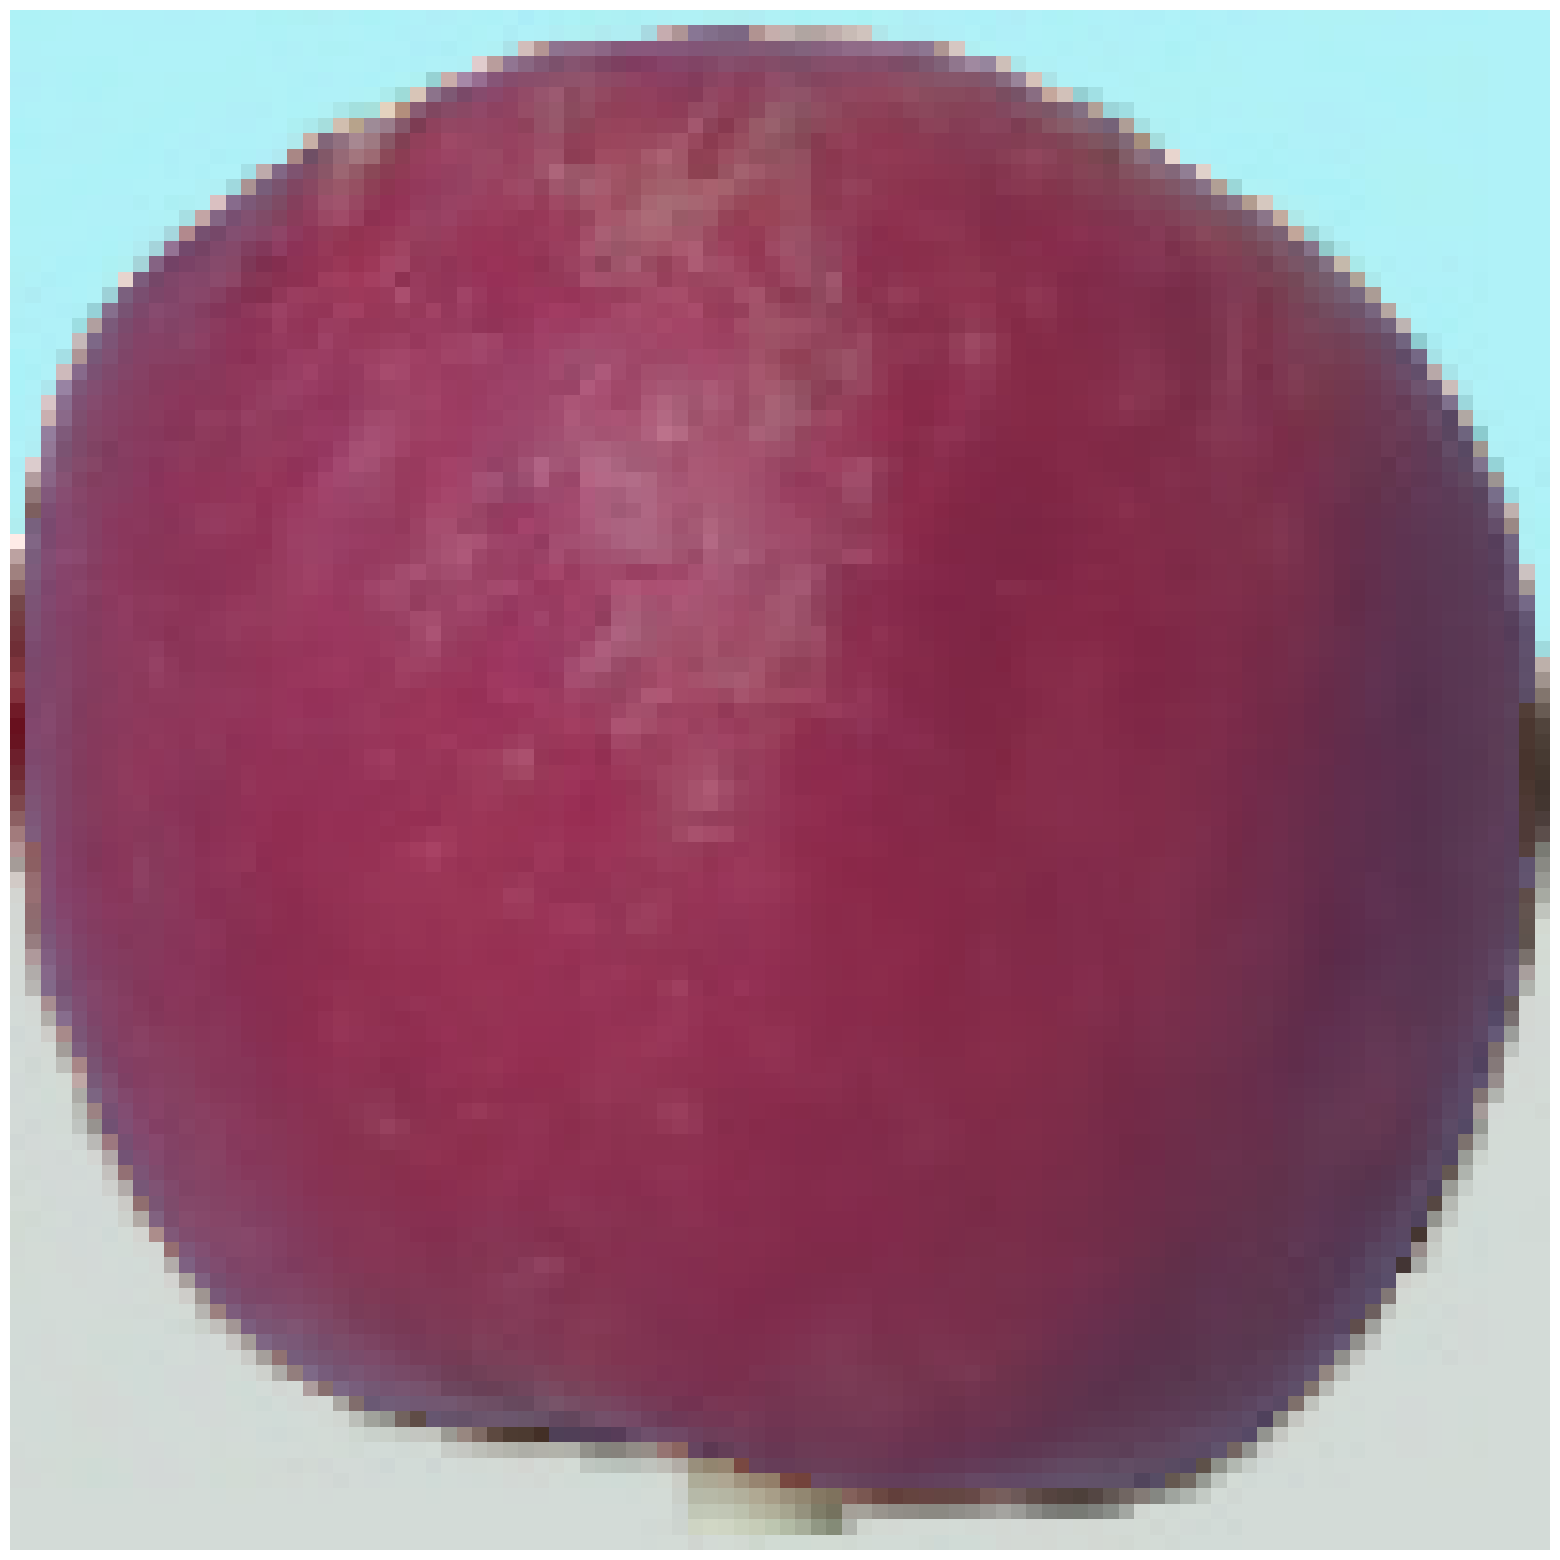

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 



In [7]:
import cv2
import os
import numpy as np
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Load the SAM model
sam = sam_model_registry["vit_h"](checkpoint="D:\\ML\\sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

# Directories
input_folder = "D:\\ML\\fruits-360\\xyz"  # Replace with your image folder path
output_folder = "D:\\ML\\fruits-360\\label"  # Replace with your output folder path

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each image
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Check if the image was loaded properly
        if image is None:
            print(f"Error loading image {image_path}")
            continue

        # Generate masks using SAM
        masks = mask_generator.generate(image)

        # Process each mask
        for i, mask in enumerate(masks):
            # Save the mask as a binary image
            mask_output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_mask_{i}.png")
            cv2.imwrite(mask_output_path, mask['segmentation'].astype(np.uint8) * 255)

            # Get the mask segmentation
            segmentation = mask['segmentation']

            # Find contours of the mask
            contours, _ = cv2.findContours(segmentation.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Process each contour to get bounding boxes
            for contour in contours:
                # Get bounding box coordinates
                x, y, w, h = cv2.boundingRect(contour)

                # Calculate YOLO format (normalized values)
                img_height, img_width = image.shape[:2]
                x_center = (x + w / 2) / img_width
                y_center = (y + h / 2) / img_height
                width = w / img_width
                height = h / img_height

                # Save the YOLO format annotation
                yolo_annotation_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.txt")
                with open(yolo_annotation_path, 'a') as f:  # Append mode to add all masks to the same file
                    # Assuming class_id is 0 for all masks. Change it as needed.
                    class_id = 0
                    f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

print("Auto-labeling completed.")


Auto-labeling completed.


In [2]:
import cv2
import os
import numpy as np
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Load the SAM model
sam = sam_model_registry["vit_h"](checkpoint="D:\\ML\\sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

# Directories
input_folder ="D:\\ML\\fruits-360\\xyz"  # Replace with your image folder path
output_folder = "D:\\ML\\fruits-360\\label"  # Replace with your output folder path

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each image
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Check if the image was loaded properly
        if image is None:
            print(f"Error loading image {image_path}")
            continue

        # Generate masks using SAM
        masks = mask_generator.generate(image)

        # Save each mask as a binary image
        for i, mask in enumerate(masks):
            mask_output_path = os.path.join(output_folder, f"{filename}_mask_{i}.png")
            cv2.imwrite(mask_output_path, mask['segmentation'].astype(np.uint8) * 255)

print("Auto-labeling completed.")


Auto-labeling completed.


In [1]:
import cv2
import os
import numpy as np
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Load the SAM model
sam = sam_model_registry["vit_h"](checkpoint="D:\\ML\\sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

# Directories
input_folder = "D:\\ML\\fruits-360\\xyz"  # Replace with your image folder path
output_folder = "D:\\ML\\fruits-360\\label"  # Replace with your output folder path

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each image
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Check if the image was loaded properly
        if image is None:
            print(f"Error loading image {image_path}")
            continue

        # Generate masks using SAM
        masks = mask_generator.generate(image)

        # Prepare to save annotations
        annotations = []

        # Save each mask as a binary image and generate YOLO annotations
        for i, mask in enumerate(masks):
            mask_array = mask['segmentation']
            class_id = 0  # Assuming a single class for all masks; change as necessary

            # Find contours of the mask
            contours, _ = cv2.findContours(mask_array.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                # Get the bounding box for each contour
                x, y, w, h = cv2.boundingRect(contour)

                # Calculate YOLO format values
                img_height, img_width = image.shape[:2]
                x_center = (x + w / 2) / img_width
                y_center = (y + h / 2) / img_height
                width = w / img_width
                height = h / img_height

                # Append the annotation
                annotations.append(f"{class_id} {x_center} {y_center} {width} {height}")

        # Save annotations to a text file
        annotation_file_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.txt")
        with open(annotation_file_path, 'w') as f:
            for annotation in annotations:
                f.write(annotation + '\n')

print("Auto-labeling completed.")


c:\Users\jayme\AppData\Local\Programs\Python\Python312\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

Auto-labeling completed.


In [1]:
import os
import cv2

def create_yolo_annotation(image_path, class_id, save_path):
    """
    Create YOLO annotation file for a bounding box that covers the whole image.
    
    YOLO format: <class_id> <x_center> <y_center> <width> <height>
    All values are normalized between 0 and 1.
    """
    # Read the image to get its dimensions
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Could not read image {image_path}. Skipping.")
        return
    
    img_height, img_width, _ = img.shape
    
    # Full image bounding box (normalized)
    x_center = 0.5
    y_center = 0.5
    width = 1.0
    height = 1.0
    
    # Prepare the annotation string
    annotation = f"{class_id} {x_center} {y_center} {width} {height}\n"
    
    # Save the annotation to the corresponding .txt file
    label_file = os.path.join(save_path, os.path.splitext(os.path.basename(image_path))[0] + ".txt")
    with open(label_file, 'w') as file:
        file.write(annotation)

def main(training_folder):
    """
    Main function to traverse the training folder and create YOLO annotations.
    Each subfolder will be assigned a different class ID.
    """
    # Get all subfolders in the training folder
    subfolders = [f.path for f in os.scandir(training_folder) if f.is_dir()]
    class_id_mapping = {subfolder: idx for idx, subfolder in enumerate(subfolders)}

    # Create an output directory for the labels if not exists
    label_output_folder = os.path.join(training_folder, "labels")
    if not os.path.exists(label_output_folder):
        os.makedirs(label_output_folder)

    # Traverse each subfolder
    for subfolder in subfolders:
        class_id = class_id_mapping[subfolder]
        class_name = os.path.basename(subfolder)  # Get the class name from the subfolder path

        # Create a subfolder in labels for this class if it doesn't exist
        class_label_folder = os.path.join(label_output_folder, class_name)
        if not os.path.exists(class_label_folder):
            os.makedirs(class_label_folder)

        image_files = [f for f in os.listdir(subfolder) if f.endswith(('.png', '.jpg', '.jpeg'))]

        for image_file in image_files:
            image_path = os.path.join(subfolder, image_file)

            # Create YOLO annotation for the whole image
            create_yolo_annotation(image_path, class_id, class_label_folder)

    print("YOLO annotations created successfully.")

if __name__ == "__main__":
    training_folder = "D:\\ML\\fruits-360\\Training\\images"
    main(training_folder)


YOLO annotations created successfully.


In [6]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'


In [9]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(data = "D:\\ML\\YOLOV\\Fruit_11\\data.yaml" , epochs = 50 , device = 0)

Ultralytics 8.3.17  Python-3.12.3 torch-2.4.1+cu124 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: 0
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [23]:
from ultralytics import YOLO

# Load the model
model = YOLO("D:\\ML\\runs\\detect\\train13\\weights\\best.pt")

# Perform prediction on all images in the specified folder and save the results
results = model.predict(source="D:\\ML\\xyz",  save=True , device =0 )

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Ultralytics YOLOv8.0.81  Python-3.12.3 torch-2.4.1+cu124 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): True
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: 0
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [1]:
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from autodistill_yolov8 import YOLOv8

# define an ontology to map class names to our GroundingDINO prompt
# the ontology dictionary has the format {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will
# be saved for that caption in the generated annotations
base_model = GroundedSAM(ontology=CaptionOntology({"Apple": "Apple",
                                                  }))

# label all images in a folder called `context_images`
base_model.label(
  input_folder = "D:\\ML\\xyz",
  output_folder= "D:\\ML\\label_apple"
)

# target_model = YOLOv8("yolov8n.pt")
# target_model.train("./dataset/data.yaml", epochs=200)

# run inference on the new model
# pred = target_model.predict("./dataset/valid/your-image.jpg", confidence=0.5)
# print(pred)

# optional: upload your model to Roboflow for deployment
# from roboflow import Roboflow

# rf = Roboflow(api_key="API_KEY")
# project = rf.workspace().project("PROJECT_ID")
# project.version(DATASET_VERSION).deploy(model_type="yolov8", model_path=f"./runs/detect/train/")

c:\Users\jayme\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


trying to load grounding dino directly


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3610.)


final text_encoder_type: bert-base-uncased


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possibl

Labeled dataset created - ready for distillation.


DetectionDataset(classes=['Apple'], images={'0_100 (10).jpg': array([[[255, 255, 254],
        [255, 255, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255

In [1]:
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from autodistill_yolov8 import YOLOv8

target_model = YOLOv8("yolov8s.pt")
target_model.train("D:\\ML\\YOLOV\\Fruit_11\\data.yaml", epochs=50 , device = 'gpu')


c:\Users\jayme\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ultralytics 8.3.17  Python-3.12.3 torch-2.4.1+cu124 


ValueError: Invalid CUDA 'device=gpu' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): True
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [10]:
from ultralytics import YOLO

target_model = YOLO()
target_model.train(data ="D:\\ML\\YOLOV\\Fruit_11\\data.yaml", epochs=50)



Ultralytics 8.3.17  Python-3.12.3 torch-2.4.1+cu124 CPU (AMD Ryzen 7 6800HS with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=D:\ML\YOLOV\Fruit_11\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning D:\ML\YOLOV\Fruit_11\train\labels.cache... 4010 images, 10 backgrounds, 0 corrupt: 100%|██████████| 4010/4010 [00:00<?, ?it/s]
val: Scanning D:\ML\YOLOV\Fruit_11\valid\labels.cache... 111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 111/111 [00:00<?, ?it/s]


Plotting labels to runs\detect\train17\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train17
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.449       4.04      1.771        103        640:   5%|▍         | 12/251 [00:41<13:46,  3.46s/it]


KeyboardInterrupt: 